## Lead Scoring Case Study

### Step 1: Importing and Merging Data

In [417]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [418]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [419]:
pd.set_option('display.max_columns', 500)

In [420]:
# Importing all datasets
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [421]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [422]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [423]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [424]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [425]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [426]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [427]:
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
Kuwait                     4
South Africa               4
Germany                    4
Sweden                     3
Bangladesh                 2
Belgium                    2
Italy                      2
China                      2
Asia/Pacific Region        2
Ghana                      2
Philippines                2
Netherlands                2
Uganda                     2
Denmark                    1
Indonesia                  1
Liberia                    1
Tanzania                   1
Sri Lanka                  1
Vietnam                    1
Russia        

In [428]:
# For country instead of making all countries into dummy variables we can just create a binary variable which 
# says Indian or not. 
leads["indian"]=leads.Country.apply(lambda x: 1 if x=="India" else 0)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1


In [429]:
# Removing country column
leads.drop(columns="Country",inplace=True)

In [430]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1


In [431]:
# Looking at categorical variables
leads["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [432]:
# Creating dummy variables for Lead Origin
lo = pd.get_dummies(leads['Lead Origin'], prefix='lead_origin')
lo1 = lo.drop(['lead_origin_Quick Add Form'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,0,1,0,0


In [433]:
leads["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
blog                    1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [434]:
# Replacing google with Google 
leads["Lead Source"]=leads["Lead Source"].replace({"google":"Google",})


In [435]:
# Creating dummy variables for Lead Source and everthing after Facebook is categorized as others and dropped as we need
# n-1 dummy variables.
lo = pd.get_dummies(leads['Lead Source'], prefix='lead_source')
lo1 = lo.drop(['lead_source_welearnblog_Home',
              'lead_source_bing',
'lead_source_Click2call',
'lead_source_Live Chat',
'lead_source_Press_Release',
'lead_source_Social Media' , 
'lead_source_testone'       ,
'lead_source_blog'          ,
'lead_source_NC_EDM'        ,
'lead_source_Pay per Click Ads',       
'lead_source_WeLearn'           ,      
'lead_source_youtubechannel'     ,     
              ], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,0,1,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,0,1,0,0,0,0,1,0,0,0,0,0


In [436]:
# Looking at categorical variables
leads["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [437]:
# Creating dummy variables for Last Activity and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['Last Activity'], prefix='last_activity')
lo1 = lo.drop(['last_activity_Approached upfront'                 
,'last_activity_View in browser link Clicked'       
,'last_activity_Email Marked Spam'                  
,'last_activity_Email Received'                     
,'last_activity_Resubscribed to emails'             
,'last_activity_Visited Booth in Tradeshow'                       
              ], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [438]:
# Replacing Select with NaN
leads.replace({"Select":np.nan},inplace=True)

In [439]:
# Looking at categorical variables
leads["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [440]:
# Creating dummy variables and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['Specialization'], prefix='specialization',dummy_na=True)
lo1 = lo.drop(['specialization_Services Excellence'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [441]:
# Looking at categorical variables
leads["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [442]:
# Creating dummy variables and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['Specialization'], prefix='specialization',dummy_na=True)
lo1 = lo.drop(['specialization_Services Excellence'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Bet

In [443]:
# Adding up the missing values (column-wise) and getting % of total
null_val=leads.isnull().sum()*100/len(leads.index)

In [444]:
pd.DataFrame(null_val).head(36)

,0
Prospect ID,0.000000
Lead Number,0.000000
Lead Origin,0.000000
Lead Source,0.389610
Do Not Email,0.000000
Do Not Call,0.000000
Converted,0.000000
TotalVisits,1.482684
Total Time Spent on Website,0.000000
Page Views Per Visit,1.482684


In [445]:
# Removing How did you hear about X Education and lead profile as it has a lot of null values
leads.drop(columns=["How did you hear about X Education","Lead Profile"],inplace=True)

In [446]:
# Removing Tags as it has a lot of null values
leads.drop(columns=["Tags"],inplace=True)

In [447]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Might be,0,0,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Not Sure,0,0,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [448]:
# Looking at categorical variables
leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [449]:
# Creating dummy variables and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['What is your current occupation'], prefix='occupation',dummy_na=True)
lo1 = lo.drop(['occupation_Businessman'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Might be,0,0,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career P

In [450]:
# Looking at categorical variables
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [451]:
# For this column, we can create a binary variable if this is N/A or not as everyone is generally choosing better prospects
# in this dataset
leads["reason_present"]=leads["What matters most to you in choosing a course"].apply(lambda x: 0 if pd.isnull(x) else 1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Might be,0,0,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemp

In [452]:
# Looking at categorical variables
leads["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [453]:
# Creating dummy variables and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['Lead Quality'], prefix='quality',dummy_na=True)
lo1 = lo.drop(['quality_Low in Relevance'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Might be,0,0,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-

In [454]:
# Looking at categorical variables
leads["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [455]:
# Creating dummy variables and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['City'], prefix='city',dummy_na=True)
lo1 = lo.drop(['city_Tier II Cities'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Might be,0,0,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,1,0,0,1,0,0,0,0,0,0,0,0

In [456]:
# Looking at categorical variables
leads["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [457]:
# Creating dummy variables and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['City'], prefix='city',dummy_na=True)
lo1 = lo.drop(['city_Tier II Cities'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administrati

In [458]:
# Looking at categorical variables
leads["Asymmetrique Activity Index"].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [459]:
# Creating dummy variables and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['Asymmetrique Activity Index'], prefix='AAI',dummy_na=True)
lo1 = lo.drop(['AAI_03.Low'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2

In [460]:
# Looking at categorical variables
leads["Asymmetrique Profile Index"].value_counts()
# Also we see that the index are just a reflection of score. So we can delete the score columns are there are a lot of 
# null which we are adjusting here.

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [461]:
# Creating dummy variables and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['Asymmetrique Profile Index'], prefix='API',dummy_na=True)
lo1 = lo.drop(['API_03.Low'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan,API_01.High,API_02.Medium,API_nan
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,

In [462]:
# Looking at categorical variables
leads["Last Notable Activity"].value_counts()
# Also we see that the index are just a reflection of score. So we can delete the score columns are there are a lot of 
# null which we are adjusting here.

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [463]:
# Creating dummy variables and again removing very low frequency variables from the set as they 
# should not be used due to lack of data points and can skew the results
lo = pd.get_dummies(leads['Last Notable Activity'], prefix='LNA')
lo1 = lo.drop(['LNA_Email Marked Spam'
,'LNA_Form Submitted on Website'
,'LNA_Resubscribed to emails'
,'LNA_Email Received'
,'LNA_View in browser link Clicked'
,'LNA_Approached upfront'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan,API_01.High,API_02.Medium,API_nan,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Had a Phone Conversation,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,

In [464]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan,API_01.High,API_02.Medium,API_nan,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Had a Phone Conversation,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Low in Relevance,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,0,0,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,1,1,

In [465]:
# Removing unnecessary columns
leads.drop(columns=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"
                   ,"What matters most to you in choosing a course","Lead Quality","City","Asymmetrique Activity Index"
                   ,"Asymmetrique Profile Index","Last Notable Activity"],inplace=True)

In [466]:
# Removing unnecessary columns
leads.drop(columns=["Asymmetrique Activity Score","Asymmetrique Profile Score"],inplace=True)

In [467]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan,API_01.High,API_02.Medium,API_nan,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Had a Phone Conversation,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,

#### Checking for Missing Values in Remaining Variables

In [468]:
# Adding up the missing values (column-wise) and getting % of total
null_val=leads.isnull().sum()*100/len(leads.index)

In [469]:
null_val=pd.DataFrame(null_val).head(30)

In [470]:
null_val[null_val[0]>0]

,0
TotalVisits,1.482684
Page Views Per Visit,1.482684


In [471]:
leads.shape

(9240, 120)

In [472]:
# As the null rates are very low for continuous columns we can simply remove such rows
leads_1=leads[~((leads["TotalVisits"].isnull()) | (leads["Page Views Per Visit"].isnull()))]

In [473]:
leads_1.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan,API_01.High,API_02.Medium,API_nan,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Had a Phone Conversation,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,

In [474]:
# Removing prospect id column as it is also not needed
leads_1.drop(columns="Prospect ID",inplace=True)

In [475]:
leads_1.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan,API_01.High,API_02.Medium,API_nan,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Had a Phone Conversation,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,

In [476]:
leads_1.shape

(9103, 119)

In [477]:
# Checking the binary variables which have sum of columns as 0.
leads_1.sum(axis=0)[leads_1.sum(axis=0)==0]

Magazine                                    0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
dtype: float64

In [478]:
# Removing above columns which have not factored into conversion
leads_1.drop(columns=["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content"
                     ,"Get updates on DM Content","I agree to pay the amount through cheque"],inplace=True)

### Step 4: Test-Train Split

In [479]:
from sklearn.model_selection import train_test_split

In [480]:
# Putting feature variable to X
X = leads_1.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan,API_01.High,API_02.Medium,API_nan,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Had a Phone Conversation,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,

In [481]:
# Putting response variable to y
y = leads_1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [482]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [483]:
from sklearn.preprocessing import StandardScaler

In [484]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan,API_01.High,API_02.Medium,API_nan,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Had a Phone Conversation,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
7962,0,0,-0.092900,1.476324,-0.394072,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5520,0,0,0.695064,-0.771066,2.111481,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1962,0,0,0.301082,-0.571257,0.061483,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1566,0,0,2.074000,1.393834,0.517039,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9170,0,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [485]:
### Checking the conversion Rate
converted = (sum(leads_1['Converted'])/len(leads_1['Converted'].index))*100
converted

38.02043282434362

We have 38% lead conversion rate which shows a decent balance in data.

### Step 6: Looking at Correlations

In [486]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [487]:
leads_1.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,indian,lead_origin_API,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Reference,lead_source_Referral Sites,lead_source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Supply Chain Management,specialization_Travel and Tourism,specialization_nan,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,occupation_nan,reason_present,quality_High in Relevance,quality_Might be,quality_Not Sure,quality_Worst,quality_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_nan,AAI_01.High,AAI_02.Medium,AAI_nan,API_01.High,API_02.Medium,API_nan,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Had a Phone Conversation,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
Lead Number,1.000000,-0.099650,0.012140,0.022614,0.022223,0.018502,0.058808,-0.012641,-0.012321,-0.003115,0.004718,-0.017754,-0.005646,-0.106532,0.051196,0.049656,-0.069033,0.023041,0.075824,-0.141035,0.072764,0.140833,-0.066967,-0.018001,0.022984,0.172157,0.003733,0.014706,-0.052664,0.027218,0.103979,0.014787,0.013353,0.004436,0.011523,-0.137671,0.079587,-0.001776,0.004053,-0.007163,0.003877,-0.000585,-0.010379,-0.007552,0.003428,-0.009931,-0.030518,-0.008832,0.000236,-0.015615,-0.009987,-0.010823,0.025480,-0.018004,-0.003783,0.048049,0.004053,-0.007163,0.003877,-0.000585,-0.010379,-0.007552,0.003428,-0.009931,-0.030518,-0.008832,0.000236,-0.015615,-0.009987,-0.010823,0.025480,-0.018004,-0.003783,0.048049,-0.013853,-0.012132,-0.033070,-0.029229,-0.015291,0.052693,-0.052838,-0.001919,0.025588,-0.016426,-0.126030,0.038851,-0.038214,0.007789,-0.006487,-0.025443,0.025133,0.039396,-0.038214,0.007789,-0.006487,-0.025443,0.025133,0.039396,-0.044534,0.179934,-0.162707,0.027470,0.148995,-0.162707,0.000848,0.015917,0.082093,0.000363,0.073308,-0.030971,0.003198,-0.168310,0.

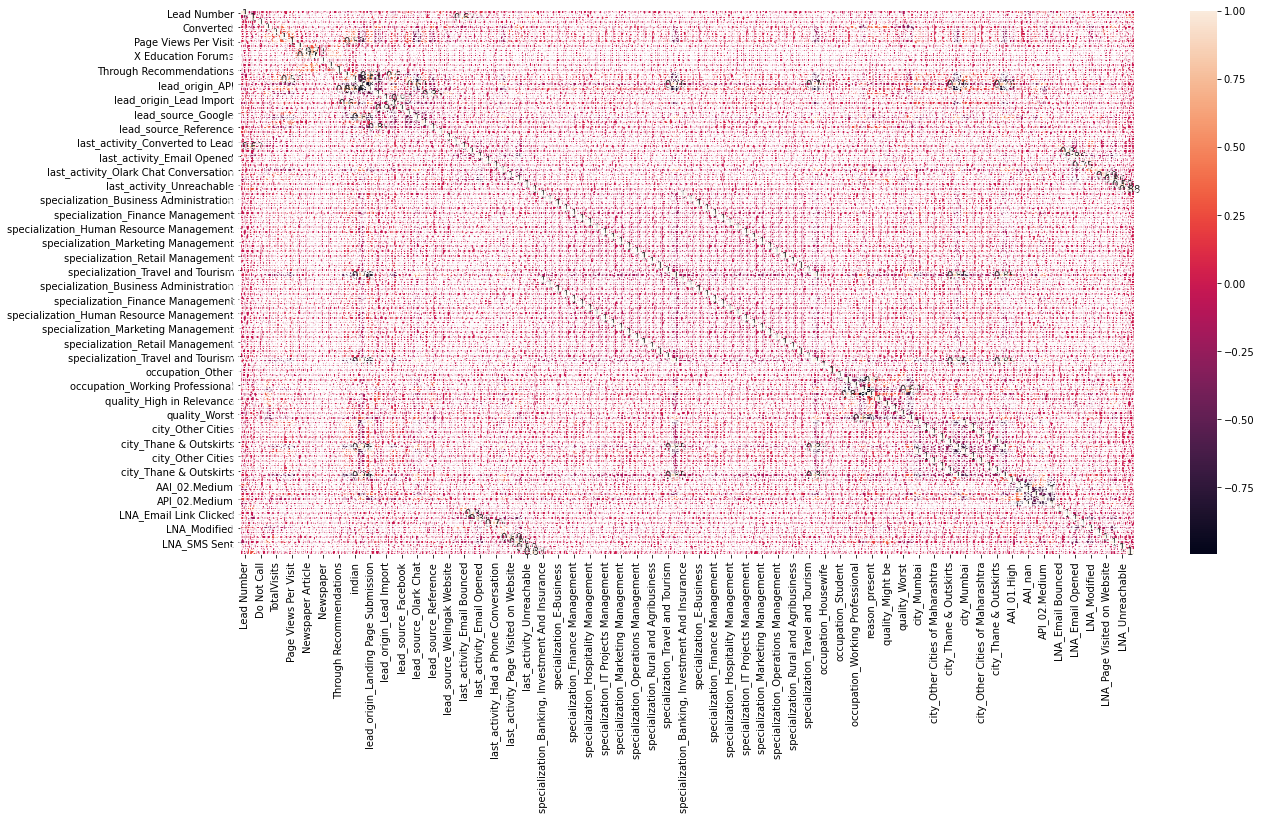

In [488]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_1.corr(),annot = True)
plt.show()

In [489]:
# We see dark squares at places which means high correlations but it's mostly on the lighter side
# So we will in this case straight away move to RFE to lessen the number of variables for the model.

### Step 7: Model Building

#### Running Your First Training Model

In [490]:
import statsmodels.api as sm

In [491]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 06 Feb 2021   Deviance:                          nan
Time:                        12:48:06   Pearson chi2:                 6.24e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -1.022e+15   4.16e+07  -2.46e+07      0.000   -1.02e+15   -1.02e+15
Do Not Email                                       -6.2e+14   4.44e+06   -1.4e+08      0.000    -6.2e+14    -6.2e+14
Do Not Call                                       9.459e+14   4.78e+07   1.98e+07      0.000    9.46e+14    9.46e+14
TotalVisits                                       9.685e+13   1.02e+06   9.49e+07      0.000    9.68e+13    9.68e+13
Total Time Spent on Website                       6.776e+14      1e+06   6.78e+08      0.000    6.78e+14    6.78e+14
Page Views Per Visit                             -1.603e+14   1.22e+06  -1.32e+08      0.000    -1.6e+14    -1.6e+14
Search                                           -8.866e+14   2.24e+07  -3.96e+07      0.000   -8.87e+14   -8.87e+14
Newspaper Article                                -7.518e+14   4.25e+07  -1.77e+07      0.000   -7.52e+14   -7.52e+14
X Education Forums                               -7.518e+14   4.25e+07  -1.77e+07      0.000   -7.52e+14   -7.52e+14
Newspaper                                        -4.872e+15   6.74e+07  -7.22e+07      0.000   -4.87e+15   -4.87e+15
Digital Advertisement                            -1.349e+15   3.91e+07  -3.45e+07      0.000   -1.35e+15   -1.35e+15
Through Recommendations                           2.096e+15   3.16e+07   6.63e+07      0.000     2.1e+15     2.1e+15
A free copy of Mastering The Interview            7.943e+13   2.73e+06   2.91e+07      0.000    7.94e+13    7.94e+13
indian                                           -6.991e+13   3.99e+06  -1.75e+07      0.000   -6.99e+13   -6.99e+13
lead_origin_API                                  -5.069e+14   1.65e+07  -3.07e+07      0.000   -5.07e+14   -5.07e+14
lead_origin_Landing Page Submission              -8.302e+14   1.65e+07  -5.02e+07      0.000    -8.3e+14    -8.3e+14
lead_origin_Lead Add Form                         1.759e+14   1.94e+07   9.08e+06      0.000    1.76e+14    1.76e+14
lead_origin_Lead Import                           1.387e+14   3.98e+07   3.49e+06      0.000    1.39e+14    1.39e+14
lead_source_Direct Traffic                       -2.535e+14   1.74e+07  -1.46e+07      0.000   -2.53e+14   -2.53e+14
lead_source_Facebook                             -3.158e+14   4.91e+07  -6.44e+06      0.000   -3.16e+14   -3.16e+14
lead_source_Google                               -8.376e+13   1.73e+07  -4.83e+06      0.000   -8.38e+13   -8.38e+13
lead_source_Olark Chat                            -3.79e+14   1.77e+07  -2.14e+07      0.000   -3.79e+14   -3.79e+14
lead_source_Organic Search                       -1.215e+14   1.75e+07  -6.95e+06      0.000   -1.21e+14   -1.21e+14
lead_source_Reference                    

### Step 8.1: Feature Selection Using RFE

In [492]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [493]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [494]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False])

In [495]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 49),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 48),
 ('Search', False, 54),
 ('Newspaper Article', False, 66),
 ('X Education Forums', False, 72),
 ('Newspaper', False, 19),
 ('Digital Advertisement', False, 36),
 ('Through Recommendations', False, 38),
 ('A free copy of Mastering The Interview', False, 79),
 ('indian', False, 31),
 ('lead_origin_API', False, 11),
 ('lead_origin_Landing Page Submission', False, 10),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 96),
 ('lead_source_Direct Traffic', False, 32),
 ('lead_source_Facebook', False, 20),
 ('lead_source_Google', False, 34),
 ('lead_source_Olark Chat', False, 2),
 ('lead_source_Organic Search', False, 33),
 ('lead_source_Reference', False, 12),
 ('lead_source_Referral Sites', False, 16),
 ('lead_source_Welingak Website', True, 1),
 ('last_activity_Converted to Lead', False, 4),
 ('las

In [496]:
col = X_train.columns[rfe.support_]

In [497]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'lead_origin_Lead Add Form',
       'lead_source_Welingak Website', 'last_activity_Olark Chat Conversation',
       'occupation_Housewife', 'occupation_Working Professional',
       'quality_High in Relevance', 'quality_Not Sure', 'quality_Worst',
       'quality_nan', 'AAI_01.High', 'AAI_02.Medium', 'AAI_nan',
       'LNA_SMS Sent', 'LNA_Unreachable'],
      dtype='object')

##### Assessing the model with StatsModels

In [498]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.1
Date:                Sat, 06 Feb 2021   Deviance:                       5026.2
Time:                        12:48:18   Pearson chi2:                 6.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4386      0.273     -5.274      0.000      -1.973      -0.904
Do Not Email                             -1.2352      0.169     -7.316      0.000      -1.566      -0.904
lead_origin_Lead Add Form                 1.5441      0.238      6.484      0.000       1.077       2.011
lead_source_Welingak Website              3.4978      0.763      4.586      0.000       2.003       4.993
last_activity_Olark Chat Conversation    -1.2940      0.164     -7.888      0.000      -1.616      -0.972
occupation_Housewife                     21.9849    1.8e+04      0.001      0.999   -3.52e+04    3.52e+04
occupation_Working Professional           1.8072      0.202      8.936      0.000       1.411       2.204
quality_High in Relevance                 1.8754      0.233      8.053      0.000       1.419       2.332
quality_Not Sure                         -2.1963      0.120    -18.362      0.000      -2.431      -1.962
quality_Worst                            -4.2608      0.368    -11.577      0.000      -4.982      -3.539
quality_nan                              -2.0212      0.088    -22.916      0.000      -2.194      -1.848
AAI_01.High                               2.5203      0.297      8.493      0.000       1.939       3.102
AAI_02.Medium                             1.9123      0.273      6.994      0.000       1.376       2.448
AAI_nan                                   1.8535      0.274      6.763      0.000       1.316       2.391
LNA_SMS Sent                              1.5061      0.084     17.916      0.000       1.341       1.671
LNA_Unreachable                           1.3503      0.571      2.366      0.018       0.232       2.469
=========================================================================================================
"""

In [499]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.489641
5520    0.167099
1962    0.151527
1566    0.947293
9170    0.280989
5097    0.167099
8954    0.446068
309     0.746805
5519    0.474964
1050    0.912860
dtype: float64

In [500]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.4896414 , 0.16709872, 0.15152707, 0.94729259, 0.28098935,
       0.16709872, 0.44606815, 0.74680478, 0.47496437, 0.91286002])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [501]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.489641,7962
1,0,0.167099,5520
2,0,0.151527,1962
3,1,0.947293,1566
4,0,0.280989,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [502]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.489641,7962,0
1,0,0.167099,5520,0
2,0,0.151527,1962,0
3,1,0.947293,1566,1
4,0,0.280989,9170,0


In [503]:
from sklearn import metrics

In [504]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3639  314]
 [ 801 1618]]


In [505]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8250156936597615


#### Checking VIFs

In [506]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [507]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,quality_nan,3.69
12,AAI_nan,3.58
11,AAI_02.Medium,2.85
10,AAI_01.High,1.61
1,lead_origin_Lead Add Form,1.58
7,quality_Not Sure,1.54
13,LNA_SMS Sent,1.54
8,quality_Worst,1.39
2,lead_source_Welingak Website,1.37
6,quality_High in Relevance,1.34


 First we can try to drop `occupation_Housewife` as it has a high p-value

In [508]:
col = col.drop('occupation_Housewife', 1)
col

Index(['Do Not Email', 'lead_origin_Lead Add Form',
       'lead_source_Welingak Website', 'last_activity_Olark Chat Conversation',
       'occupation_Working Professional', 'quality_High in Relevance',
       'quality_Not Sure', 'quality_Worst', 'quality_nan', 'AAI_01.High',
       'AAI_02.Medium', 'AAI_nan', 'LNA_SMS Sent', 'LNA_Unreachable'],
      dtype='object')

In [509]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.2
Date:                Sat, 06 Feb 2021   Deviance:                       5032.4
Time:                        12:48:18   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4295      0.273     -5.241      0.000      -1.964      -0.895
Do Not Email                             -1.2387      0.169     -7.334      0.000      -1.570      -0.908
lead_origin_Lead Add Form                 1.5457      0.238      6.495      0.000       1.079       2.012
lead_source_Welingak Website              3.4970      0.763      4.585      0.000       2.002       4.992
last_activity_Olark Chat Conversation    -1.2975      0.164     -7.907      0.000      -1.619      -0.976
occupation_Working Professional           1.7977      0.202      8.883      0.000       1.401       2.194
quality_High in Relevance                 1.8618      0.233      7.996      0.000       1.405       2.318
quality_Not Sure                         -2.2085      0.120    -18.475      0.000      -2.443      -1.974
quality_Worst                            -4.2749      0.368    -11.617      0.000      -4.996      -3.554
quality_nan                              -2.0348      0.088    -23.108      0.000      -2.207      -1.862
AAI_01.High                               2.5246      0.297      8.506      0.000       1.943       3.106
AAI_02.Medium                             1.9165      0.273      7.009      0.000       1.381       2.452
AAI_nan                                   1.8622      0.274      6.794      0.000       1.325       2.399
LNA_SMS Sent                              1.5006      0.084     17.854      0.000       1.336       1.665
LNA_Unreachable                           1.3472      0.571      2.360      0.018       0.228       2.466
=========================================================================================================
"""

In [510]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [511]:
y_train_pred[:10]

array([0.48819423, 0.16768717, 0.15168476, 0.94748816, 0.28094445,
       0.16768717, 0.44500803, 0.7493317 , 0.47464135, 0.91284077])

In [512]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [513]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.488194,7962,0
1,0,0.167687,5520,0
2,0,0.151685,1962,0
3,1,0.947488,1566,1
4,0,0.280944,9170,0


In [514]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8250156936597615


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [515]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,quality_nan,3.67
11,AAI_nan,3.56
10,AAI_02.Medium,2.83
9,AAI_01.High,1.60
1,lead_origin_Lead Add Form,1.57
12,LNA_SMS Sent,1.54
6,quality_Not Sure,1.53
7,quality_Worst,1.39
2,lead_source_Welingak Website,1.37
5,quality_High in Relevance,1.34


In [516]:
# Let's drop quality_nan since it has a high VIF
col = col.drop('quality_nan')
col

Index(['Do Not Email', 'lead_origin_Lead Add Form',
       'lead_source_Welingak Website', 'last_activity_Olark Chat Conversation',
       'occupation_Working Professional', 'quality_High in Relevance',
       'quality_Not Sure', 'quality_Worst', 'AAI_01.High', 'AAI_02.Medium',
       'AAI_nan', 'LNA_SMS Sent', 'LNA_Unreachable'],
      dtype='object')

In [517]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2805.0
Date:                Sat, 06 Feb 2021   Deviance:                       5610.0
Time:                        12:48:19   Pearson chi2:                 6.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.6927      0.262    -10.271      0.000      -3.207      -2.179
Do Not Email                             -1.3149      0.161     -8.168      0.000      -1.630      -0.999
lead_origin_Lead Add Form                 2.0834      0.227      9.162      0.000       1.638       2.529
lead_source_Welingak Website              2.4520      0.757      3.240      0.001       0.969       3.935
last_activity_Olark Chat Conversation    -1.4524      0.156     -9.325      0.000      -1.758      -1.147
occupation_Working Professional           2.8121      0.185     15.167      0.000       2.449       3.175
quality_High in Relevance                 3.2680      0.226     14.487      0.000       2.826       3.710
quality_Not Sure                         -0.8602      0.103     -8.313      0.000      -1.063      -0.657
quality_Worst                            -2.8375      0.367     -7.734      0.000      -3.557      -2.118
AAI_01.High                               2.1336      0.286      7.461      0.000       1.573       2.694
AAI_02.Medium                             1.7636      0.265      6.652      0.000       1.244       2.283
AAI_nan                                   1.5667      0.265      5.905      0.000       1.047       2.087
LNA_SMS Sent                              1.7329      0.079     22.014      0.000       1.579       1.887
LNA_Unreachable                           1.2949      0.537      2.412      0.016       0.243       2.347
=========================================================================================================
"""

In [518]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [519]:
y_train_pred[:10]

array([0.69078137, 0.24489464, 0.14315339, 0.90491   , 0.36375987,
       0.24489464, 0.4858923 , 0.36375987, 0.64722583, 0.91204562])

In [520]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [521]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.690781,7962,1
1,0,0.244895,5520,0
2,0,0.143153,1962,0
3,1,0.904910,1566,1
4,0,0.363760,9170,0


In [522]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8075957313245449


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [523]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,AAI_nan,1.64
1,lead_origin_Lead Add Form,1.56
11,LNA_SMS Sent,1.49
9,AAI_02.Medium,1.37
2,lead_source_Welingak Website,1.35
3,last_activity_Olark Chat Conversation,1.28
8,AAI_01.High,1.23
5,quality_High in Relevance,1.18
6,quality_Not Sure,1.18
4,occupation_Working Professional,1.16


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [524]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3631,  322],
       [ 904, 1515]])

In [525]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8075957313245449

In [526]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [527]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6262918561389004

In [528]:
# Let us calculate specificity
TN / float(TN+FP)

0.918542878826208

In [529]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08145712117379206


In [530]:
# positive predictive value 
print (TP / float(TP+FP))

0.8247142079477409


In [531]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8006615214994487


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [532]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [533]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

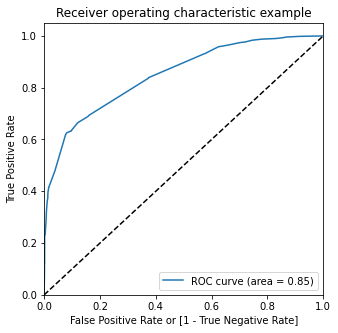

In [534]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [535]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.690781,7962,1,1,1,1,1,1,1,1,0,0,0
1,0,0.244895,5520,0,1,1,1,0,0,0,0,0,0,0
2,0,0.143153,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.904910,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.363760,9170,0,1,1,1,1,0,0,0,0,0,0


In [536]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.555869  0.974370  0.299772
0.2   0.2  0.615819  0.932203  0.422211
0.3   0.3  0.783898  0.694088  0.838857
0.4   0.4  0.798023  0.664324  0.879838
0.5   0.5  0.807596  0.626292  0.918543
0.6   0.6  0.808067  0.621745  0.922084
0.7   0.7  0.767734  0.414634  0.983810
0.8   0.8  0.754080  0.372881  0.987351
0.9   0.9  0.727872  0.294750  0.992917


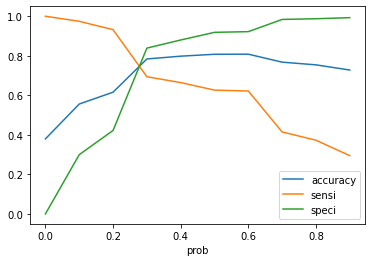

In [537]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [538]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.690781,7962,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.244895,5520,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.143153,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.904910,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.363760,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [539]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7838983050847458

In [540]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3316,  637],
       [ 740, 1679]])

In [541]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [542]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6940884663083919

In [543]:
# Let us calculate specificity
TN / float(TN+FP)

0.8388565646344548

### Precision and recall tradeoff

In [544]:
from sklearn.metrics import precision_recall_curve

In [545]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [546]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

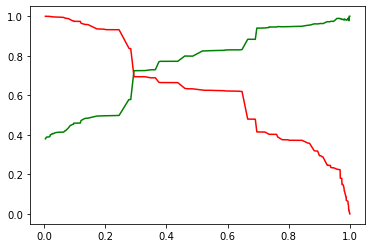

In [547]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Again, the threshold comes to around 0.3 if we consider the tradeoff between precision and recall

### Step 11: Making predictions on the test set

In [548]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [549]:
X_test = X_test[col]
X_test.head()

,Do Not Email,lead_origin_Lead Add Form,lead_source_Welingak Website,last_activity_Olark Chat Conversation,occupation_Working Professional,quality_High in Relevance,quality_Not Sure,quality_Worst,AAI_01.High,AAI_02.Medium,AAI_nan,LNA_SMS Sent,LNA_Unreachable
3504,0,0,0,0,0,0,1,0,0,0,1,0,0
4050,0,1,0,0,0,1,0,0,0,0,1,1,0
7201,1,0,0,0,0,0,0,0,0,0,1,1,0
1196,0,0,0,0,0,0,0,0,0,1,0,0,0
8219,0,0,0,0,0,0,0,0,1,0,0,0,0


In [550]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [551]:
y_test_pred = res.predict(X_test_sm)

In [552]:
y_test_pred[:10]

3504    0.120654
4050    0.997422
7201    0.330043
1196    0.283103
8219    0.363760
8747    0.363760
9048    0.133086
6524    0.244895
7693    0.202409
8187    0.947209
dtype: float64

In [553]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [554]:
# Let's see the head
y_pred_1.head()

,0
3504,0.120654
4050,0.997422
7201,0.330043
1196,0.283103
8219,0.363760


In [555]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [556]:
# Putting Lead number to index
y_test_df['LeadID'] = y_test_df.index

In [557]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [558]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [559]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3504,0.120654
1,1,4050,0.997422
2,0,7201,0.330043
3,0,1196,0.283103
4,1,8219,0.363760


In [560]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [561]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,3504,0.120654
1,1,4050,0.997422
2,0,7201,0.330043
3,0,1196,0.283103
4,1,8219,0.363760


In [562]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [563]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,3504,0,0.120654
1,4050,1,0.997422
2,7201,0,0.330043
3,1196,0,0.283103
4,8219,1,0.363760


In [564]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [565]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,3504,0,0.120654,0
1,4050,1,0.997422,1
2,7201,0,0.330043,1
3,1196,0,0.283103,0
4,8219,1,0.363760,1


In [566]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7857927499084585

In [567]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1431,  258],
       [ 327,  715]])

In [568]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [569]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6861804222648752

In [570]:
# Let us calculate specificity
TN / float(TN+FP)

0.8472468916518651

### The model seems to do a good job on the test set as well.

### But as the model sensitivity is low and we want to predict good leads well, we will try to create a second model.

### Step 8.2: Building model using variables by adding variables with high correlation

In [571]:
col_2=['LNA_SMS Sent']

In [572]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3830.8
Date:                Sat, 06 Feb 2021   Deviance:                       7661.7
Time:                        12:48:21   Pearson chi2:                 6.37e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9342      0.032    -29.243      0.000      -0.997      -0.872
LNA_SMS Sent     1.7228      0.064     27.048      0.000       1.598       1.848
================================================================================
"""

In [573]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.687541
5520    0.282083
1962    0.282083
1566    0.282083
9170    0.282083
5097    0.282083
8954    0.687541
309     0.282083
5519    0.687541
1050    0.282083
dtype: float64

In [574]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68754077, 0.28208308, 0.28208308, 0.28208308, 0.28208308,
       0.28208308, 0.68754077, 0.28208308, 0.68754077, 0.28208308])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [575]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.687541,7962
1,0,0.282083,5520
2,0,0.282083,1962
3,1,0.282083,1566
4,0,0.282083,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [576]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.687541,7962,1
1,0,0.282083,5520,0
2,0,0.282083,1962,0
3,1,0.282083,1566,0
4,0,0.282083,9170,0


In [577]:
from sklearn import metrics

In [578]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3474  479]
 [1365 1054]]


In [579]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7106089139987445


#### Adding another variable

In [580]:
col_2=['LNA_SMS Sent','Total Time Spent on Website']

In [581]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6369
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3481.7
Date:                Sat, 06 Feb 2021   Deviance:                       6963.4
Time:                        12:48:21   Pearson chi2:                 6.50e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9655      0.034    -28.257      0.000      -1.033      -0.899
LNA_SMS Sent                    1.7057      0.068     25.180      0.000       1.573       1.838
Total Time Spent on Website     0.7477      0.030     25.198      0.000       0.690       0.806
===============================================================================================
"""

In [582]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.863426
5520    0.176231
1962    0.198979
1566    0.519161
9170    0.164608
5097    0.164608
8954    0.648351
309     0.220313
5519    0.520325
1050    0.467132
dtype: float64

In [583]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86342593, 0.1762311 , 0.19897873, 0.51916081, 0.16460793,
       0.16460793, 0.64835096, 0.22031261, 0.52032501, 0.46713177])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [584]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.863426,7962
1,0,0.176231,5520
2,0,0.198979,1962
3,1,0.519161,1566
4,0,0.164608,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [585]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.863426,7962,1
1,0,0.176231,5520,0
2,0,0.198979,1962,0
3,1,0.519161,1566,1
4,0,0.164608,9170,0


In [586]:
from sklearn import metrics

In [587]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3196  757]
 [ 944 1475]]


In [588]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7330508474576272


#### Checking VIFs

In [589]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [590]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,LNA_SMS Sent,1.01
1,Total Time Spent on Website,1.01


#### Adding another variable - 2

In [591]:
pd.DataFrame((leads_1.corr()).loc[:,'Converted']).sort_values(by='Converted',ascending=False)

,Converted
Converted,1.000000
LNA_SMS Sent,0.362200
Total Time Spent on Website,0.354939
quality_Might be,0.350217
last_activity_SMS Sent,0.338020
...,...
quality_Worst,-0.197303
last_activity_Olark Chat Conversation,-0.209246
LNA_Modified,-0.264267
occupation_nan,-0.322672


In [592]:
col_2=['LNA_SMS Sent','Total Time Spent on Website','quality_Might be']

In [593]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6368
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3301.3
Date:                Sat, 06 Feb 2021   Deviance:                       6602.6
Time:                        12:48:22   Pearson chi2:                 6.51e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.1481      0.037    -31.336      0.000      -1.220      -1.076
LNA_SMS Sent                    1.3924      0.071     19.517      0.000       1.253       1.532
Total Time Spent on Website     0.7246      0.031     23.750      0.000       0.665       0.784
quality_Might be                1.5667      0.086     18.245      0.000       1.398       1.735
===============================================================================================
"""

In [594]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.788199
5520    0.153578
1962    0.173357
1566    0.806688
9170    0.143501
5097    0.143501
8954    0.529943
309     0.532331
5519    0.402718
1050    0.415824
dtype: float64

In [595]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78819869, 0.15357818, 0.17335724, 0.80668756, 0.14350127,
       0.14350127, 0.52994338, 0.53233098, 0.40271782, 0.41582446])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [596]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.788199,7962
1,0,0.153578,5520
2,0,0.173357,1962
3,1,0.806688,1566
4,0,0.143501,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [597]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.788199,7962,1
1,0,0.153578,5520,0
2,0,0.173357,1962,0
3,1,0.806688,1566,1
4,0,0.143501,9170,0


In [598]:
from sklearn import metrics

In [599]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3440  513]
 [1152 1267]]


In [600]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7387005649717514


#### Checking VIFs

In [601]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [602]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,quality_Might be,1.29
0,LNA_SMS Sent,1.28
1,Total Time Spent on Website,1.02


### Adding another variable - 3

In [603]:
pd.DataFrame((leads_1.corr()).loc[:,'Converted']).sort_values(by='Converted',ascending=False)

,Converted
Converted,1.000000
LNA_SMS Sent,0.362200
Total Time Spent on Website,0.354939
quality_Might be,0.350217
last_activity_SMS Sent,0.338020
...,...
quality_Worst,-0.197303
last_activity_Olark Chat Conversation,-0.209246
LNA_Modified,-0.264267
occupation_nan,-0.322672


In [604]:
col_2=['LNA_SMS Sent','Total Time Spent on Website','quality_Might be','quality_nan']

In [605]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6367
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3201.9
Date:                Sat, 06 Feb 2021   Deviance:                       6403.9
Time:                        12:48:22   Pearson chi2:                 6.42e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5951      0.052    -11.423      0.000      -0.697      -0.493
LNA_SMS Sent                    1.3690      0.072     18.936      0.000       1.227       1.511
Total Time Spent on Website     0.6902      0.031     22.243      0.000       0.629       0.751
quality_Might be                1.0219      0.093     10.933      0.000       0.839       1.205
quality_nan                    -0.9485      0.068    -14.042      0.000      -1.081      -0.816
===============================================================================================
"""

In [606]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.699395
5520    0.111474
1962    0.271032
1566    0.800409
9170    0.104174
5097    0.104174
8954    0.658239
309     0.537796
5519    0.313749
1050    0.543541
dtype: float64

In [607]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.69939451, 0.11147414, 0.27103224, 0.80040938, 0.10417396,
       0.10417396, 0.65823942, 0.53779629, 0.31374882, 0.54354109])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [608]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.699395,7962
1,0,0.111474,5520
2,0,0.271032,1962
3,1,0.800409,1566
4,0,0.104174,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [609]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.699395,7962,1
1,0,0.111474,5520,0
2,0,0.271032,1962,0
3,1,0.800409,1566,1
4,0,0.104174,9170,0


In [610]:
from sklearn import metrics

In [611]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3381  572]
 [ 979 1440]]


In [612]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7565913370998116


#### Checking VIFs

In [613]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [614]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,LNA_SMS Sent,1.38
2,quality_Might be,1.30
3,quality_nan,1.10
1,Total Time Spent on Website,1.05


### Adding another variable - 4

In [615]:
pd.DataFrame((leads_1.corr()).loc[:,'Converted']).sort_values(by='Converted',ascending=False)

,Converted
Converted,1.000000
LNA_SMS Sent,0.362200
Total Time Spent on Website,0.354939
quality_Might be,0.350217
last_activity_SMS Sent,0.338020
...,...
quality_Worst,-0.197303
last_activity_Olark Chat Conversation,-0.209246
LNA_Modified,-0.264267
occupation_nan,-0.322672


In [616]:
col_2=['LNA_SMS Sent','Total Time Spent on Website','quality_Might be','quality_nan','occupation_nan']

In [617]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6366
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3145.5
Date:                Sat, 06 Feb 2021   Deviance:                       6290.9
Time:                        12:48:23   Pearson chi2:                 6.18e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5868      0.052    -11.265      0.000      -0.689      -0.485
LNA_SMS Sent                    1.3261      0.072     18.292      0.000       1.184       1.468
Total Time Spent on Website     0.6959      0.031     22.151      0.000       0.634       0.757
quality_Might be                1.0314      0.093     11.043      0.000       0.848       1.214
quality_nan                    -0.4766      0.079     -6.040      0.000      -0.631      -0.322
occupation_nan                 -0.9889      0.095    -10.440      0.000      -1.175      -0.803
===============================================================================================
"""

In [618]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.784132
5520    0.167977
1962    0.272028
1566    0.804465
9170    0.157550
5097    0.065043
8954    0.650171
309     0.541631
5519    0.207611
1050    0.547155
dtype: float64

In [619]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78413164, 0.16797673, 0.27202771, 0.80446469, 0.15755015,
       0.06504264, 0.65017083, 0.54163087, 0.20761087, 0.54715518])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [620]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.784132,7962
1,0,0.167977,5520
2,0,0.272028,1962
3,1,0.804465,1566
4,0,0.157550,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [621]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.784132,7962,1
1,0,0.167977,5520,0
2,0,0.272028,1962,0
3,1,0.804465,1566,1
4,0,0.157550,9170,0


In [622]:
from sklearn import metrics

In [623]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3308  645]
 [ 960 1459]]


In [624]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7481167608286252


#### Checking VIFs

In [625]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [626]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,quality_nan,2.40
4,occupation_nan,2.28
0,LNA_SMS Sent,1.38
2,quality_Might be,1.31
1,Total Time Spent on Website,1.05


In [627]:
# Accuracy dropped. Removing occupation_nan variable

### Adding another variable - 5

In [628]:
pd.DataFrame((leads_1.corr()).loc[:,'Converted']).sort_values(by='Converted',ascending=False).head(10)

,Converted
Converted,1.000000
LNA_SMS Sent,0.362200
Total Time Spent on Website,0.354939
quality_Might be,0.350217
last_activity_SMS Sent,0.338020
reason_present,0.325591
occupation_Working Professional,0.315113
quality_High in Relevance,0.307171
lead_origin_Lead Add Form,0.306224
lead_source_Reference,0.254067


In [629]:
col_2=['LNA_SMS Sent','Total Time Spent on Website','quality_Might be','quality_nan','reason_present']

In [630]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6366
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3143.2
Date:                Sat, 06 Feb 2021   Deviance:                       6286.3
Time:                        12:48:23   Pearson chi2:                 6.17e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5956      0.108    -14.756      0.000      -1.808      -1.384
LNA_SMS Sent                    1.3236      0.073     18.255      0.000       1.182       1.466
Total Time Spent on Website     0.6963      0.031     22.154      0.000       0.635       0.758
quality_Might be                1.0319      0.093     11.050      0.000       0.849       1.215
quality_nan                    -0.4642      0.079     -5.874      0.000      -0.619      -0.309
reason_present                  1.0092      0.095     10.649      0.000       0.823       1.195
===============================================================================================
"""

In [631]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.785999
5520    0.169738
1962    0.272070
1566    0.804720
9170    0.159217
5097    0.064569
8954    0.649700
309     0.541842
5519    0.205927
1050    0.547389
dtype: float64

In [632]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78599949, 0.16973842, 0.2720702 , 0.8047205 , 0.15921704,
       0.06456913, 0.6497001 , 0.54184199, 0.20592651, 0.54738935])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [633]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.785999,7962
1,0,0.169738,5520
2,0,0.272070,1962
3,1,0.804720,1566
4,0,0.159217,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [634]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.785999,7962,1
1,0,0.169738,5520,0
2,0,0.272070,1962,0
3,1,0.804720,1566,1
4,0,0.159217,9170,0


In [635]:
from sklearn import metrics

In [636]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3307  646]
 [ 960 1459]]


In [637]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7479598242310107


#### Checking VIFs

In [638]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [639]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,reason_present,1.77
2,quality_Might be,1.53
0,LNA_SMS Sent,1.50
3,quality_nan,1.28
1,Total Time Spent on Website,1.05


### Adding another variable - 6

In [640]:
pd.DataFrame((leads_1.corr()).loc[:,'Converted']).sort_values(by='Converted',ascending=False).head(10)

,Converted
Converted,1.000000
LNA_SMS Sent,0.362200
Total Time Spent on Website,0.354939
quality_Might be,0.350217
last_activity_SMS Sent,0.338020
reason_present,0.325591
occupation_Working Professional,0.315113
quality_High in Relevance,0.307171
lead_origin_Lead Add Form,0.306224
lead_source_Reference,0.254067


In [641]:
col_2=['LNA_SMS Sent','Total Time Spent on Website','quality_Might be','quality_nan','reason_present','quality_High in Relevance']

In [642]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6365
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2841.3
Date:                Sat, 06 Feb 2021   Deviance:                       5682.6
Time:                        12:48:24   Pearson chi2:                 6.16e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.2626      0.116    -19.589      0.000      -2.489      -2.036
LNA_SMS Sent                    1.4112      0.076     18.686      0.000       1.263       1.559
Total Time Spent on Website     0.7353      0.033     22.023      0.000       0.670       0.801
quality_Might be                1.6591      0.100     16.614      0.000       1.463       1.855
quality_nan                     0.1754      0.087      2.019      0.043       0.005       0.346
reason_present                  1.0150      0.096     10.604      0.000       0.827       1.203
quality_High in Relevance       3.8671      0.224     17.265      0.000       3.428       4.306
===============================================================================================
"""

In [643]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.806049
5520    0.162571
1962    0.158733
1566    0.807889
9170    0.151859
5097    0.060935
8954    0.509348
309     0.529491
5519    0.210179
1050    0.968915
dtype: float64

In [644]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.80604925, 0.16257097, 0.15873343, 0.80788853, 0.1518588 ,
       0.06093465, 0.50934766, 0.52949079, 0.21017875, 0.9689151 ])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [645]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.806049,7962
1,0,0.162571,5520
2,0,0.158733,1962
3,1,0.807889,1566
4,0,0.151859,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [646]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.806049,7962,1
1,0,0.162571,5520,0
2,0,0.158733,1962,0
3,1,0.807889,1566,1
4,0,0.151859,9170,0


In [647]:
from sklearn import metrics

In [648]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3492  461]
 [ 939 1480]]


In [649]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7802887633396108


#### Checking VIFs

In [650]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [651]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,reason_present,2.03
2,quality_Might be,1.61
0,LNA_SMS Sent,1.50
3,quality_nan,1.32
5,quality_High in Relevance,1.18
1,Total Time Spent on Website,1.06


### Adding another variable - 7

In [652]:
pd.DataFrame((leads_1.corr()).loc[:,'Converted']).sort_values(by='Converted',ascending=False).head(10)

,Converted
Converted,1.000000
LNA_SMS Sent,0.362200
Total Time Spent on Website,0.354939
quality_Might be,0.350217
last_activity_SMS Sent,0.338020
reason_present,0.325591
occupation_Working Professional,0.315113
quality_High in Relevance,0.307171
lead_origin_Lead Add Form,0.306224
lead_source_Reference,0.254067


In [653]:
col_2=['LNA_SMS Sent','Total Time Spent on Website','quality_Might be','quality_nan','reason_present','quality_High in Relevance','lead_origin_Lead Add Form']

In [654]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6364
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Sat, 06 Feb 2021   Deviance:                       5210.1
Time:                        12:48:25   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.1232      0.122    -17.473      0.000      -2.361      -1.885
LNA_SMS Sent                    1.3373      0.080     16.801      0.000       1.181       1.493
Total Time Spent on Website     0.9061      0.035     25.622      0.000       0.837       0.975
quality_Might be                1.5170      0.104     14.557      0.000       1.313       1.721
quality_nan                     0.0116      0.093      0.125      0.901      -0.171       0.194
reason_present                  0.7239      0.101      7.133      0.000       0.525       0.923
quality_High in Relevance       3.3754      0.230     14.683      0.000       2.925       3.826
lead_origin_Lead Add Form       3.5396      0.213     16.604      0.000       3.122       3.957
===============================================================================================
"""

In [655]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.783683
5520    0.110426
1962    0.128204
1566    0.799085
9170    0.101010
5097    0.051666
8954    0.445832
309     0.439343
5519    0.171847
1050    0.951964
dtype: float64

In [656]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78368334, 0.11042615, 0.12820351, 0.79908508, 0.10100994,
       0.05166551, 0.44583221, 0.43934263, 0.17184702, 0.95196363])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [657]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.783683,7962
1,0,0.110426,5520
2,0,0.128204,1962
3,1,0.799085,1566
4,0,0.101010,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [658]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.783683,7962,1
1,0,0.110426,5520,0
2,0,0.128204,1962,0
3,1,0.799085,1566,1
4,0,0.101010,9170,0


In [659]:
from sklearn import metrics

In [660]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3551  402]
 [ 771 1648]]


In [661]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8159133709981168


#### Checking VIFs

In [662]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [663]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,reason_present,2.06
2,quality_Might be,1.63
0,LNA_SMS Sent,1.51
3,quality_nan,1.32
5,quality_High in Relevance,1.26
6,lead_origin_Lead Add Form,1.26
1,Total Time Spent on Website,1.13


### Adding another variable - 8

In [664]:
pd.DataFrame((leads_1.corr()).loc[:,'Converted']).sort_values(by='Converted',ascending=False).head(10)

,Converted
Converted,1.000000
LNA_SMS Sent,0.362200
Total Time Spent on Website,0.354939
quality_Might be,0.350217
last_activity_SMS Sent,0.338020
reason_present,0.325591
occupation_Working Professional,0.315113
quality_High in Relevance,0.307171
lead_origin_Lead Add Form,0.306224
lead_source_Reference,0.254067


In [665]:
col_2=['LNA_SMS Sent','Total Time Spent on Website','quality_Might be','quality_nan','reason_present','quality_High in Relevance','lead_origin_Lead Add Form','lead_source_Reference']

In [666]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6363
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.9
Date:                Sat, 06 Feb 2021   Deviance:                       5195.7
Time:                        12:48:25   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.0756      0.122    -17.009      0.000      -2.315      -1.836
LNA_SMS Sent                    1.3321      0.080     16.705      0.000       1.176       1.488
Total Time Spent on Website     0.9055      0.035     25.593      0.000       0.836       0.975
quality_Might be                1.5148      0.104     14.605      0.000       1.312       1.718
quality_nan                    -0.0346      0.094     -0.369      0.712      -0.218       0.149
reason_present                  0.6935      0.102      6.799      0.000       0.494       0.893
quality_High in Relevance       3.3831      0.229     14.761      0.000       2.934       3.832
lead_origin_Lead Add Form       4.8414      0.519      9.321      0.000       3.823       5.859
lead_source_Reference          -1.8500      0.567     -3.264      0.001      -2.961      -0.739
===============================================================================================
"""

In [667]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.777667
5520    0.107644
1962    0.130169
1566    0.801361
9170    0.098444
5097    0.051755
8954    0.448801
309     0.443099
5519    0.171361
1050    0.953057
dtype: float64

In [668]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.77766668, 0.10764378, 0.13016926, 0.80136053, 0.09844403,
       0.05175494, 0.44880084, 0.4430989 , 0.17136098, 0.95305744])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [669]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.777667,7962
1,0,0.107644,5520
2,0,0.130169,1962
3,1,0.801361,1566
4,0,0.098444,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [670]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.777667,7962,1
1,0,0.107644,5520,0
2,0,0.130169,1962,0
3,1,0.801361,1566,1
4,0,0.098444,9170,0


In [671]:
from sklearn import metrics

In [672]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3551  402]
 [ 772 1647]]


In [673]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8157564344005022


#### Checking VIFs

In [674]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [675]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,lead_origin_Lead Add Form,3.75
7,lead_source_Reference,3.71
4,reason_present,2.06
2,quality_Might be,1.65
0,LNA_SMS Sent,1.51
3,quality_nan,1.33
5,quality_High in Relevance,1.29
1,Total Time Spent on Website,1.13


In [676]:
# Removing lead source reference

### Adding another variable - 9

In [677]:
pd.DataFrame((leads_1.corr()).loc[:,'Converted']).sort_values(by='Converted',ascending=False).tail(10)

,Converted
lead_source_Olark Chat,-0.125395
last_activity_Email Bounced,-0.127649
Do Not Email,-0.136553
specialization_nan,-0.158220
specialization_nan,-0.158220
quality_Worst,-0.197303
last_activity_Olark Chat Conversation,-0.209246
LNA_Modified,-0.264267
occupation_nan,-0.322672
quality_nan,-0.360083


In [678]:
col_2=['LNA_SMS Sent','Total Time Spent on Website','quality_Might be','quality_nan','reason_present','quality_High in Relevance','lead_origin_Lead Add Form','LNA_Modified']

In [679]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6363
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.3
Date:                Sat, 06 Feb 2021   Deviance:                       5158.7
Time:                        12:48:26   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.8167      0.128    -14.171      0.000      -2.068      -1.565
LNA_SMS Sent                    1.0768      0.087     12.399      0.000       0.907       1.247
Total Time Spent on Website     0.9053      0.036     25.427      0.000       0.836       0.975
quality_Might be                1.5254      0.105     14.541      0.000       1.320       1.731
quality_nan                    -0.0141      0.094     -0.150      0.881      -0.197       0.169
reason_present                  0.6785      0.102      6.654      0.000       0.479       0.878
quality_High in Relevance       3.3279      0.231     14.401      0.000       2.875       3.781
lead_origin_Lead Add Form       3.5425      0.214     16.556      0.000       3.123       3.962
LNA_Modified                   -0.5990      0.084     -7.104      0.000      -0.764      -0.434
===============================================================================================
"""

In [680]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.779203
5520    0.135830
1962    0.094972
1566    0.838757
9170    0.124560
5097    0.067333
8954    0.446009
309     0.506502
5519    0.174862
1050    0.960805
dtype: float64

In [681]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.77920321, 0.13582995, 0.09497216, 0.83875701, 0.1245603 ,
       0.06733347, 0.44600933, 0.50650173, 0.17486194, 0.96080489])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [682]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.779203,7962
1,0,0.135830,5520
2,0,0.094972,1962
3,1,0.838757,1566
4,0,0.124560,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [683]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.779203,7962,1
1,0,0.135830,5520,0
2,0,0.094972,1962,0
3,1,0.838757,1566,1
4,0,0.124560,9170,0


In [684]:
from sklearn import metrics

In [685]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3548  405]
 [ 756 1663]]


In [686]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8177966101694916


#### Checking VIFs

In [687]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [688]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,reason_present,2.31
0,LNA_SMS Sent,1.70
7,LNA_Modified,1.67
2,quality_Might be,1.66
3,quality_nan,1.62
5,quality_High in Relevance,1.26
6,lead_origin_Lead Add Form,1.26
1,Total Time Spent on Website,1.14


### Adding another variable - 10

In [689]:
pd.DataFrame((leads_1.corr()).loc[:,'Converted']).sort_values(by='Converted',ascending=False).tail(10)

,Converted
lead_source_Olark Chat,-0.125395
last_activity_Email Bounced,-0.127649
Do Not Email,-0.136553
specialization_nan,-0.158220
specialization_nan,-0.158220
quality_Worst,-0.197303
last_activity_Olark Chat Conversation,-0.209246
LNA_Modified,-0.264267
occupation_nan,-0.322672
quality_nan,-0.360083


In [690]:
col_2=['LNA_SMS Sent','Total Time Spent on Website','quality_Might be','reason_present',
       'quality_High in Relevance','lead_origin_Lead Add Form','LNA_Modified',
       'last_activity_Olark Chat Conversation']

In [691]:
X_train_sm = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6363
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.3
Date:                Sat, 06 Feb 2021   Deviance:                       5146.6
Time:                        12:48:27   Pearson chi2:                 6.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.7933      0.086    -20.900      0.000      -1.961      -1.625
LNA_SMS Sent                              1.0560      0.087     12.169      0.000       0.886       1.226
Total Time Spent on Website               0.8921      0.036     24.968      0.000       0.822       0.962
quality_Might be                          1.5248      0.096     15.952      0.000       1.337       1.712
reason_present                            0.6709      0.089      7.573      0.000       0.497       0.845
quality_High in Relevance                 3.3222      0.227     14.620      0.000       2.877       3.768
lead_origin_Lead Add Form                 3.4982      0.213     16.396      0.000       3.080       3.916
LNA_Modified                             -0.5379      0.086     -6.259      0.000      -0.706      -0.369
last_activity_Olark Chat Conversation    -0.5521      0.165     -3.345      0.001      -0.876      -0.229
=========================================================================================================
"""

In [692]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.777412
5520    0.140608
1962    0.102490
1566    0.838328
9170    0.129164
5097    0.070485
8954    0.445346
309     0.511624
5519    0.178983
1050    0.960633
dtype: float64

In [693]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.77741246, 0.14060782, 0.10248981, 0.83832783, 0.12916414,
       0.07048514, 0.44534561, 0.51162388, 0.17898321, 0.9606327 ])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [694]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.777412,7962
1,0,0.140608,5520
2,0,0.102490,1962
3,1,0.838328,1566
4,0,0.129164,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [695]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.777412,7962,1
1,0,0.140608,5520,0
2,0,0.102490,1962,0
3,1,0.838328,1566,1
4,0,0.129164,9170,0


In [696]:
from sklearn import metrics

In [697]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3551  402]
 [ 757 1662]]


In [698]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8181104833647207


#### Checking VIFs

In [699]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [700]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,reason_present,2.21
6,LNA_Modified,1.60
0,LNA_SMS Sent,1.59
2,quality_Might be,1.52
7,last_activity_Olark Chat Conversation,1.28
5,lead_origin_Lead Add Form,1.27
4,quality_High in Relevance,1.23
1,Total Time Spent on Website,1.16


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [701]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3551,  402],
       [ 757, 1662]])

In [702]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8181104833647207

In [703]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [704]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6870607689127739

In [705]:
# Let us calculate specificity
TN / float(TN+FP)

0.8983050847457628

In [706]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1016949152542373


In [707]:
# positive predictive value 
print (TP / float(TP+FP))

0.8052325581395349


In [708]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8242804085422469


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [709]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [710]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

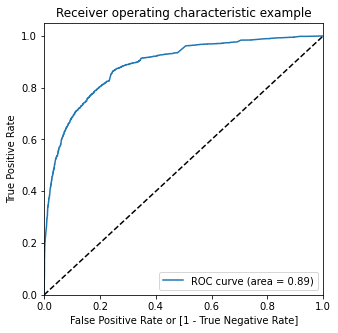

In [711]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [712]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.777412,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.140608,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.102490,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.838328,1566,1,1,1,1,1,1,1,1,1,1,0
4,0,0.129164,9170,0,1,1,0,0,0,0,0,0,0,0


In [713]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.621155  0.968995  0.408297
0.2   0.2  0.765694  0.893344  0.687579
0.3   0.3  0.789862  0.825961  0.767771
0.4   0.4  0.812304  0.758165  0.845434
0.5   0.5  0.818110  0.687061  0.898305
0.6   0.6  0.813245  0.625052  0.928409
0.7   0.7  0.798964  0.552708  0.949658
0.8   0.8  0.772442  0.444812  0.972932
0.9   0.9  0.735248  0.322034  0.988110


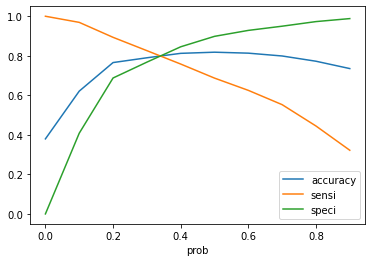

In [714]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [715]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.777412,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.140608,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.102490,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.838328,1566,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.129164,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [716]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8024168236032643

In [717]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3173,  780],
       [ 479, 1940]])

In [718]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [719]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.801984291029351

In [720]:
# Let us calculate specificity
TN / float(TN+FP)

0.802681507715659

### Precision and recall tradeoff

In [721]:
from sklearn.metrics import precision_recall_curve

In [722]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    0
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [723]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

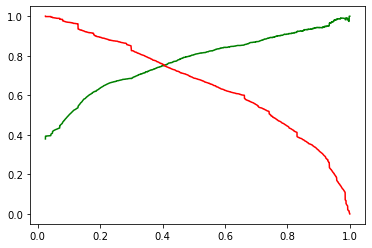

In [724]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Again, the threshold comes to around 0.35 if we consider the tradeoff between precision and recall

### Step 11: Making predictions on the test set

In [728]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [729]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [730]:
X_test = X_test[col_2]
X_test.head()

,LNA_SMS Sent,Total Time Spent on Website,quality_Might be,reason_present,quality_High in Relevance,lead_origin_Lead Add Form,LNA_Modified,last_activity_Olark Chat Conversation
3504,0,-0.103815,0,1,0,0,0,0
4050,1,-0.881052,0,1,1,1,0,0
7201,1,0.424120,1,1,0,0,0,0
1196,0,-0.105648,0,1,0,0,0,0
8219,0,-0.428274,0,1,0,0,0,0


In [731]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [732]:
y_test_pred = res.predict(X_test_sm)

In [733]:
y_test_pred[:10]

3504    0.228818
4050    0.997447
7201    0.862566
1196    0.228530
8219    0.181763
8747    0.070485
9048    0.563744
6524    0.102942
7693    0.351610
8187    0.933755
dtype: float64

In [734]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [735]:
# Let's see the head
y_pred_1.head()

,0
3504,0.228818
4050,0.997447
7201,0.862566
1196,0.228530
8219,0.181763


In [736]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [737]:
# Putting Lead number to index
y_test_df['LeadID'] = y_test_df.index

In [738]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [739]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [740]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3504,0.228818
1,1,4050,0.997447
2,0,7201,0.862566
3,0,1196,0.228530
4,1,8219,0.181763


In [741]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [742]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,3504,0.228818
1,1,4050,0.997447
2,0,7201,0.862566
3,0,1196,0.228530
4,1,8219,0.181763


In [743]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [744]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,3504,0,0.228818
1,4050,1,0.997447
2,7201,0,0.862566
3,1196,0,0.228530
4,8219,1,0.181763


In [745]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [746]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,3504,0,0.228818,0
1,4050,1,0.997447,1
2,7201,0,0.862566,1
3,1196,0,0.228530,0
4,8219,1,0.181763,0


In [747]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7989747345294764

In [748]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1363,  326],
       [ 223,  819]])

In [749]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [750]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7859884836852208

In [751]:
# Let us calculate specificity
TN / float(TN+FP)

0.8069863824748372

### The model seems to do a better job than the previous model on the test set.
## We can use model 2 to assign a lead score between 0 to 100 for each of the leads. To get the lead score, we just have to multiply the probability of conversion by 100
### The main variables of the second model and their coefficients are:
- LNA_SMS Sent: 1.056
- Total Time Spent on Website:	0.8921
- quality_Might be: 1.5239
- reason_present: 0.6699
- quality_High in Relevance: 3.3213
- lead_origin_Lead Add Form: 3.4985
- LNA_Modified: -0.5379
- last_activity_Olark Chat Conversation: -0.552